# F1 retrospective data

This simple notebook provides a connection to the analytical database with actual race data

In [1]:
driver = "alonso"
constructor = "renault"
driver_nation = "Russian"

## Connect to the analytic DB (Vertica)

In [2]:
import vertica_python
from verticapy import vDataframe

In [3]:
conn_info = {
    "host": "localhost",
    "user": "dbadmin",
    "password": "",
    "database": "docker",
    "use_prepared_statements": True,
}

cur = vertica_python.connect(**conn_info).cursor()

## Create the Virtual Dataframe of main relations

In [4]:
driver_results = vDataframe("gp_results", cursor = cur).filter(
    conditions = ["driver = '{}'".format(driver)]
)
driver_results

13684 element(s) was/were filtered


,season,driver,points,status,constructor_nation,driver_nation,grand_prix,constructor,pos_num
0,2001,alonso,0.0,+2 Laps,Italian,Spanish,Australian Grand Prix,minardi,12
1,2001,alonso,0.0,+3 Laps,Italian,Spanish,British Grand Prix,minardi,16
2,2001,alonso,0.0,+2 Laps,Italian,Spanish,European Grand Prix,minardi,14
3,2001,alonso,0.0,Engine,Italian,Spanish,French Grand Prix,minardi,17
4,2001,alonso,0.0,+1 Lap,Italian,Spanish,German Grand Prix,minardi,10
,...,...,...,...,...,...,...,...,...


<object>  Name: gp_results, Number of rows: 254, Number of columns: 9

In [5]:
constructor_results = vDataframe("gp_results", cursor = cur).filter(
    conditions = ["constructor = '{}'".format(constructor)]
)
constructor_results

13440 element(s) was/were filtered


,season,driver,points,status,constructor_nation,driver_nation,grand_prix,constructor,pos_num
0,1978,jabouille,0.0,+5 Laps,French,French,Canadian Grand Prix,renault,12
1,1978,jabouille,0.0,+4 Laps,French,French,Monaco Grand Prix,renault,10
2,1978,jabouille,0.0,+4 Laps,French,French,Spanish Grand Prix,renault,13
3,1978,jabouille,3.0,Finished,French,French,United States Grand Prix,renault,4
4,1979,arnoux,1.0,+1 Lap,French,French,Austrian Grand Prix,renault,6
,...,...,...,...,...,...,...,...,...


<object>  Name: gp_results, Number of rows: 498, Number of columns: 9

In [6]:
driver_nation_results = vDataframe("gp_results", cursor = cur).filter(
    conditions = ["driver_nation = '{}'".format(driver_nation)]
)
driver_nation_results

13799 element(s) was/were filtered


,season,driver,points,status,constructor_nation,driver_nation,grand_prix,constructor,pos_num
0,2010,petrov,8.0,Finished,French,Russian,Abu Dhabi Grand Prix,renault,6
1,2010,petrov,2.0,Finished,French,Russian,Belgian Grand Prix,renault,9
2,2010,petrov,0.0,+1 Lap,French,Russian,Brazilian Grand Prix,renault,16
3,2010,petrov,0.0,Finished,French,Russian,British Grand Prix,renault,13
4,2010,petrov,0.0,+2 Laps,French,Russian,Canadian Grand Prix,renault,17
,...,...,...,...,...,...,...,...,...


<object>  Name: gp_results, Number of rows: 139, Number of columns: 9

## Main statistic for driver, constructor, nation

### Driver stats

In [7]:
driver

'alonso'

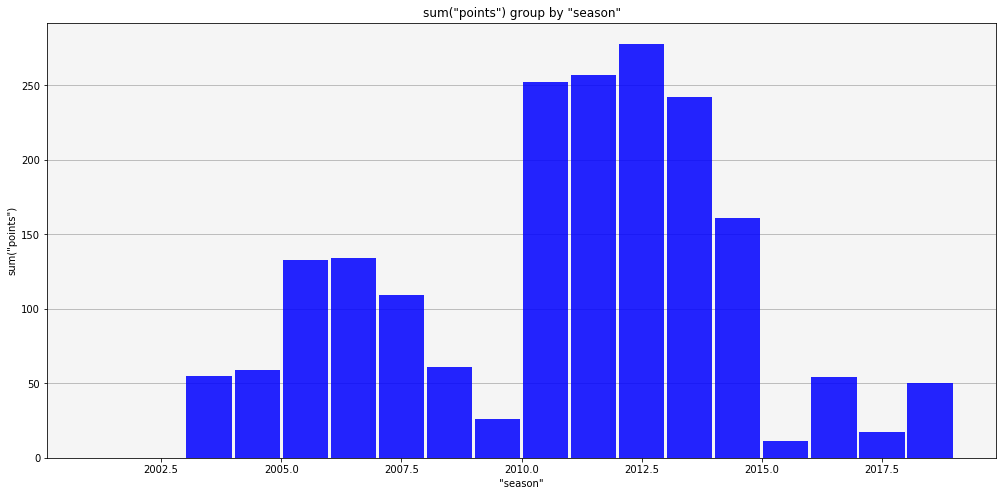

,season,driver,points,status,constructor_nation,driver_nation,grand_prix,constructor,pos_num
0,2001,alonso,0.0,+2 Laps,Italian,Spanish,Australian Grand Prix,minardi,12
1,2001,alonso,0.0,+3 Laps,Italian,Spanish,British Grand Prix,minardi,16
2,2001,alonso,0.0,+2 Laps,Italian,Spanish,European Grand Prix,minardi,14
3,2001,alonso,0.0,Engine,Italian,Spanish,French Grand Prix,minardi,17
4,2001,alonso,0.0,+1 Lap,Italian,Spanish,German Grand Prix,minardi,10
,...,...,...,...,...,...,...,...,...


<object>  Name: gp_results, Number of rows: 254, Number of columns: 9

In [8]:
driver_results["season"].hist(
    bins = driver_results["season"].nunique(), 
    method = "sum", 
    of = "points", 
    color='blue'
)

In [9]:
driver_results.pivot_table(
    columns=["grand_prix", "constructor"], 
    method="min", 
    of="pos_num", 
    show=False
)

,"""grand_prix""/""constructor""",ferrari,mclaren,minardi,renault
0,Abu Dhabi Grand Prix,2,9,,14
1,Australian Grand Prix,2,2,12,1
2,Austrian Grand Prix,5,8,,
3,Azerbaijan Grand Prix,,7,,
4,Bahrain Grand Prix,1,5,,1
5,Belgian Grand Prix,2,3,,2
6,Brazilian Grand Prix,2,3,,2
7,British Grand Prix,1,2,16,1
8,Canadian Grand Prix,2,7,,1
9,Chinese Grand Prix,1,2,,1


<object>

### Constructor stats

In [10]:
constructor

'renault'

In [11]:
constructor_results.pivot_table(
    columns=["grand_prix", "driver"], 
    method="min", 
    of="pos_num", 
    show=False
)

,"""grand_prix""/""driver""",alonso,arnoux,bruno_senna,button,cheever,fisichella,grosjean,heidfeld,hulkenberg,jabouille,jolyon_palmer,kevin_magnussen,kovalainen,kubica,petrov,piquet_jr,prost,ricciardo,sainz,tambay,trulli,villeneuve,warwick
0,Abu Dhabi Grand Prix,14,,16,,,,18,,6,,17,,,5,6,,,11,6,,,,
1,Argentine Grand Prix,,5,,,,,,,,,,,,,,,3,,,,,,
2,Australian Grand Prix,1,,,,,1,,12,7,,11,12,10,2,3,,,,10,,5,,
3,Austrian Grand Prix,,2,,7,4,,,,13,1,11,14,,,,,1,12,12,10,8,,
4,Azerbaijan Grand Prix,,,,,,,,,14,,,,,,,,,,5,,,,
5,Bahrain Grand Prix,1,,,,,8,,,6,,13,11,9,11,,10,,,11,,4,,
6,Belgian Grand Prix,2,4,13,,3,,,,6,,13,,8,3,9,,1,14,11,7,9,,2
7,Brazilian Grand Prix,2,1,17,4,,5,13,,10,10,,14,,9,10,,1,6,11,5,8,10,10
8,British Grand Prix,1,2,,12,,4,,8,6,,,17,7,,12,12,1,7,,8,6,,2
9,Caesars Palace Grand Prix,,,,,,,,,,,,,,,,,2,,,,,,


<object>

### Driver nation stats

In [12]:
driver_nation

'Russian'

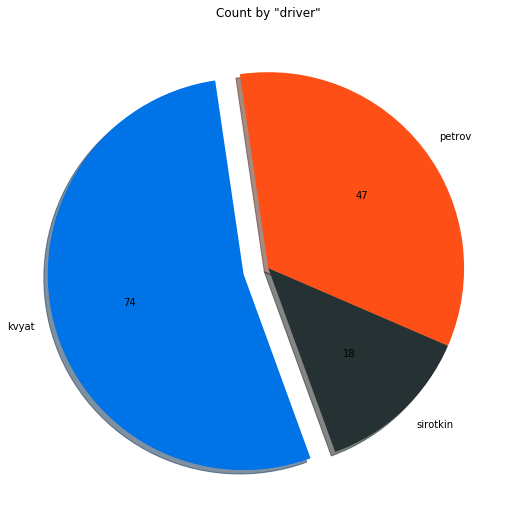

,season,driver,points,status,constructor_nation,driver_nation,grand_prix,constructor,pos_num
0,2010,petrov,8.0,Finished,French,Russian,Abu Dhabi Grand Prix,renault,6
1,2010,petrov,2.0,Finished,French,Russian,Belgian Grand Prix,renault,9
2,2010,petrov,0.0,+1 Lap,French,Russian,Brazilian Grand Prix,renault,16
3,2010,petrov,0.0,Finished,French,Russian,British Grand Prix,renault,13
4,2010,petrov,0.0,+2 Laps,French,Russian,Canadian Grand Prix,renault,17
,...,...,...,...,...,...,...,...,...


<object>  Name: gp_results, Number of rows: 139, Number of columns: 9

In [13]:
driver_nation_results["driver"].pie( 
    method = "count", 
    of = "grand_prix" 
)

In [14]:
driver_nation_results.pivot_table(
    columns=["grand_prix", "driver"], 
    method="min", 
    of="pos_num", 
    show=False
)

,"""grand_prix""/""driver""",kvyat,petrov,sirotkin
0,Abu Dhabi Grand Prix,9,6,15
1,Australian Grand Prix,9,3,
2,Austrian Grand Prix,12,,13
3,Bahrain Grand Prix,7,16,15
4,Belgian Grand Prix,4,9,12
5,Brazilian Grand Prix,7,10,16
6,British Grand Prix,6,12,14
7,Canadian Grand Prix,9,5,17
8,Chinese Grand Prix,3,7,15
9,European Grand Prix,,13,


<object>